# openseespy

# Displacement

In [33]:
import openseespy.opensees as ops
import math
import pandas as pd
def modelCreation(Tn, xi):
    k=1
    wn = 2 * math.pi / Tn  # Natural Frequency
    m = k / wn**2  # Mass
    c = 2* m * wn * xi 
    ops.model('Basic','-ndm',1,'-ndf',1)
    ops.node(1,0)
    ops.node(2,0,'-mass',m)
    ops.fix(1,1)
    mat_tag=1
    ops.uniaxialMaterial('Elastic',mat_tag,k)
    dashpot_tag=2
    alpha=1
    ops.uniaxialMaterial('Viscous', dashpot_tag, c, alpha)

        # Element
    ele_tag1=1
    ele_tag2=2
    ops.element('zeroLength', ele_tag1, 1, 2,'-mat',1,'-dir',1)
    ops.element('zeroLength',ele_tag2,1,2,'-mat',2,'-dir',1)

def groundMotion(file_path):
    ops.timeSeries('Path', 1, '-filePath', file_path, '-dt', 0.005, '-factor', 9.81)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')

def runAnalysis(steps, timestep):
    ops.numberer('RCM')
    ops.test('NormDispIncr', 1e-6, 10)
    ops.algorithm('Newton')
    ops.system('ProfileSPD')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')
    t = 0
    stable = 0
    d_max = 0
    duration = steps * timestep
    
    while t < duration:
        stable = ops.analyze(steps, timestep)
        t = ops.getTime()
        d = abs(ops.nodeDisp(2, 1))
        if d > d_max:
            d_max = d
    
    return d_max

def peakDisplacement(Tn, xi,steps,timestep,file_path):
    ops.wipe()
#     timestep = 0.005
#     steps = 64590
    modelCreation(Tn, xi)
    groundMotion(file_path)
    d_max = runAnalysis(steps, timestep)
    return d_max

# Example usage
# print(peakDisplacement(10, 0.05,64590,0.005,'C:/Users/Acer/Desktop/OpenSees/gorkha.txt'))
#setting up loop 
xi=0.05
file_path='C:/Users/Acer/Desktop/OpenSees/gorkha.txt'
Tn = 0.1
results = []
time=[]
while Tn < 3:
    # Call the peakDisplacement function and store the result
    result = peakDisplacement(Tn, xi, 64590, 0.005, file_path)
    
    # Append the result to the list along with the current Tn value
    results.append({'Tn': Tn, 'Peak Displacement': result})
    
    # Print the current Tn value (optional)
    print(result)
  
    # Increment Tn
    Tn += 0.1

# Convert the list of results to a DataFrame
peak_dfd = pd.DataFrame(results)

# Print the DataFrame (optional)
print(peak_dfd)


3.593564674055548e-07
7.189944619455985e-07
1.0273230145475766e-05
8.453211728692211e-06
6.197878009243555e-05
6.048345032576992e-05
7.754156299371688e-07
0.00012078621357556041
0.00041710605354834814
0.0005219586392543853
0.0003935447916008868
0.00015671738137440068
0.0007099859650662426
0.0010988581122513639
0.0018856562802041666
0.00045341443897577133
0.0006704547175670317
0.00018571825262835275
0.00031013392912019764
0.0014228447435556243
0.0012767186623330944
0.002339006662837192
0.002632971692305693
0.002884962964999957
0.0012163056871894022
0.0008771650204349692
0.003143363645374398
0.007845672296137985
0.01011923815180366
     Tn  Peak Displacement
0   0.1       3.593565e-07
1   0.2       7.189945e-07
2   0.3       1.027323e-05
3   0.4       8.453212e-06
4   0.5       6.197878e-05
5   0.6       6.048345e-05
6   0.7       7.754156e-07
7   0.8       1.207862e-04
8   0.9       4.171061e-04
9   1.0       5.219586e-04
10  1.1       3.935448e-04
11  1.2       1.567174e-04
12  1.3    

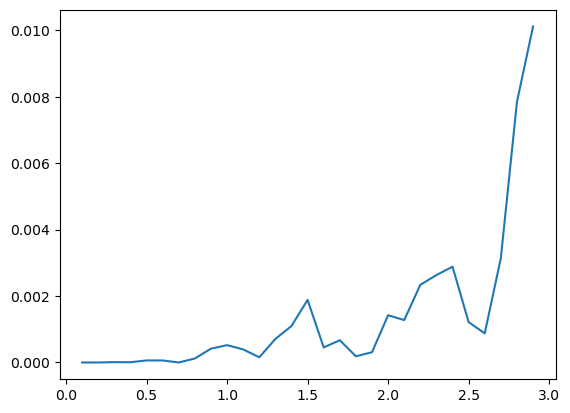

In [34]:
time=peak_dfd.iloc[:,0]
peak1=peak_dfd.iloc[:,1]
freq=1/time
# print(peak1)
import matplotlib.pyplot as plt
plt.plot(time,peak1)
plt.show()

# acceleration

In [19]:
import openseespy.opensees as ops
import math
import pandas as pd
def modelCreation(Tn, xi):
    k=1
    wn = 2 * math.pi / Tn  # Natural Frequency
    m = k / wn**2  # Mass
    c = 2 * m * wn * xi 
    ops.model('Basic','-ndm',1,'-ndf',1)
    ops.node(1,0)
    ops.node(2,0,'-mass',m)
    ops.fix(1,1)
    mat_tag=1
    ops.uniaxialMaterial('Elastic',mat_tag,k)
    dashpot_tag=2
    alpha=1
    ops.uniaxialMaterial('Viscous', dashpot_tag, c, alpha)

        # Element
    ele_tag1=1
    ele_tag2=2
    ops.element('zeroLength', ele_tag1, 1, 2,'-mat',1,'-dir',1)
    ops.element('zeroLength',ele_tag2,1,2,'-mat',2,'-dir',1)

def groundMotion(file_path):
    ops.timeSeries('Path', 1, '-filePath', file_path, '-dt', 0.005, '-factor', 9.81)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')

def runAnalysis(steps, timestep):
    ops.numberer('RCM')
    ops.test('NormDispIncr', 1e-6, 10)
    ops.algorithm('Newton')
    ops.system('ProfileSPD')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')
    t = 0
    stable = 0
    d_max = 0
    duration = steps * timestep
    
    while t < duration:
        stable = ops.analyze(steps, timestep)
        t = ops.getTime()
        d = abs(ops.nodeAccel(2, 1))
        if d > d_max:
            d_max = d
    
    return d_max

def peakAcceleration(Tn, xi,steps,timestep,file_path):
    ops.wipe()
#     timestep = 0.005
#     steps = 64590
    modelCreation(Tn, xi)
    groundMotion(file_path)
    d_max = runAnalysis(steps, timestep)
    return d_max

# Example usage
# print(peakDisplacement(10, 0.05,64590,0.005,'C:/Users/Acer/Desktop/OpenSees/gorkha.txt'))
#setting up loop 
xi=0.02
file_path='C:/Users/Acer/Desktop/OpenSees/gorkha.txt'
Tn = 0.5
results = []
time=[]
while Tn < 10.5:
    # Call the peakDisplacement function and store the result
    result = peakAcceleration(Tn, xi, 64590, 0.005, file_path)
    
    # Append the result to the list along with the current Tn value
    results.append({'Tn': Tn, 'Peak Accel': result})
    
    # Print the current Tn value (optional)
    print(result)
  
    # Increment Tn
    Tn += 0.5

# Convert the list of results to a DataFrame
peak_df = pd.DataFrame(results)

# Print the DataFrame (optional)
print(peak_df)


0.04056496167345157
0.06303764755624275
0.058722037884944484
0.04548665471027609
0.032805787899056256
0.09063107991277956
0.08511165524181909
0.1417085592589152
0.014286300447369364
0.011601865154988162
0.020963005035512444
0.0063566613463618355
0.01121235299350772
0.018337993181965575
0.013134683426628949
0.00775884448776451
0.012796271932463637
0.007436361798028069
0.012389637180814279
0.023105271602426408
      Tn  Peak Accel
0    0.5    0.040565
1    1.0    0.063038
2    1.5    0.058722
3    2.0    0.045487
4    2.5    0.032806
5    3.0    0.090631
6    3.5    0.085112
7    4.0    0.141709
8    4.5    0.014286
9    5.0    0.011602
10   5.5    0.020963
11   6.0    0.006357
12   6.5    0.011212
13   7.0    0.018338
14   7.5    0.013135
15   8.0    0.007759
16   8.5    0.012796
17   9.0    0.007436
18   9.5    0.012390
19  10.0    0.023105


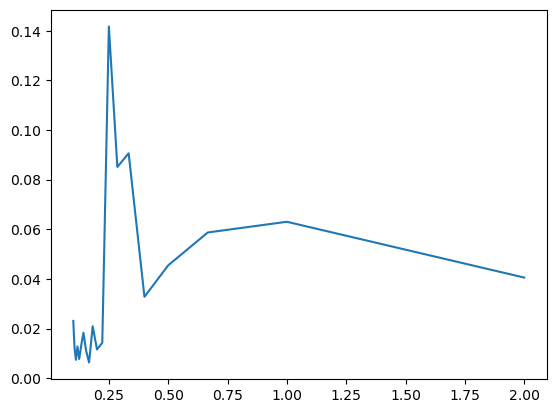

In [20]:
time=peak_df.iloc[:,0]
peak=peak_df.iloc[:,1]
freq=1/time

import matplotlib.pyplot as plt
plt.plot(freq,peak)
plt.show()